Arboles de decisión

In [52]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report

In [54]:
#Cargamos el dataset

data = pd.read_csv("E:/UNAD/UNAD 2025/PRIMER SEMESTRE/ANALISIS DE DATOS/Tarea 3/Red Wine Quality/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
# Mostramos la informacion de filas y columnas
data.shape

(1599, 12)

In [58]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [60]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

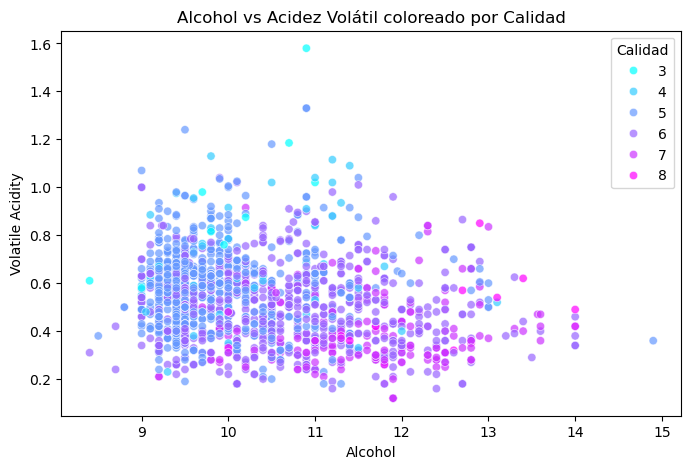

In [62]:
# Alcohol vs Volatile Acidity coloreado por calidad

plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(data=data, x="alcohol", y="volatile acidity", hue="quality", palette="cool", alpha=0.7)
plt.title("Alcohol vs Acidez Volátil coloreado por Calidad")
plt.xlabel("Alcohol")
plt.ylabel("Volatile Acidity")
plt.legend(title="Calidad")
plt.show()

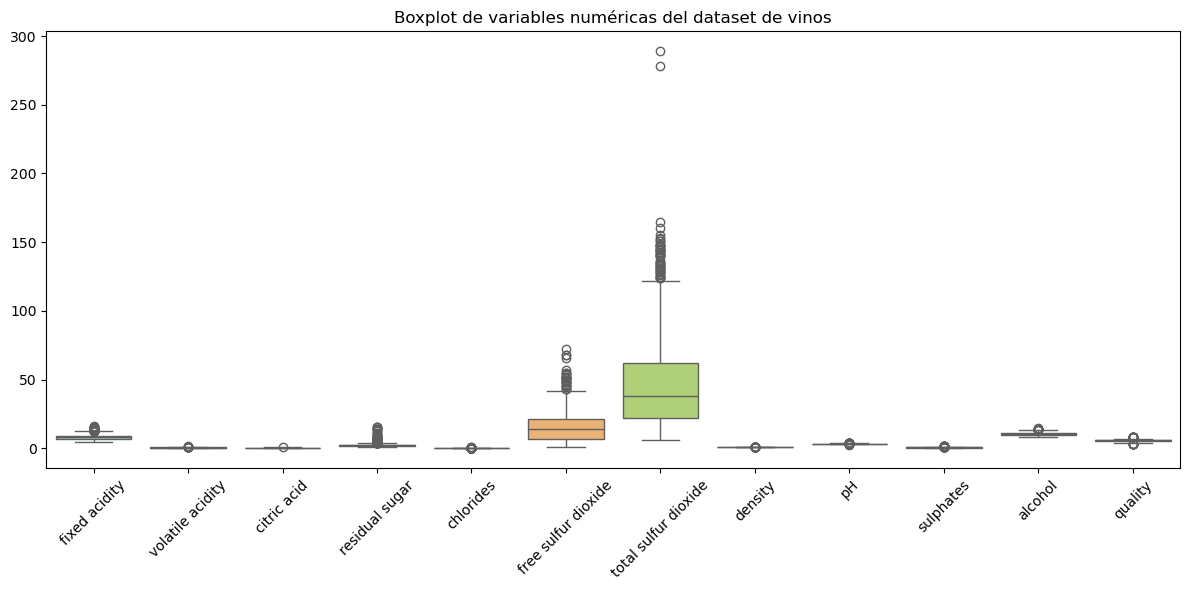

In [64]:
# Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[data.describe().columns], palette="Set3")
plt.title("Boxplot de variables numéricas del dataset de vinos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
# Cálculo de la matriz de correlación

correlation_matrix = data.corr(numeric_only=True)

# Mostrar correlación de todas las variables con respecto a la calidad

print("Correlación con la variable 'quality':")
print(correlation_matrix["quality"].sort_values(ascending=False))

Correlación con la variable 'quality':
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


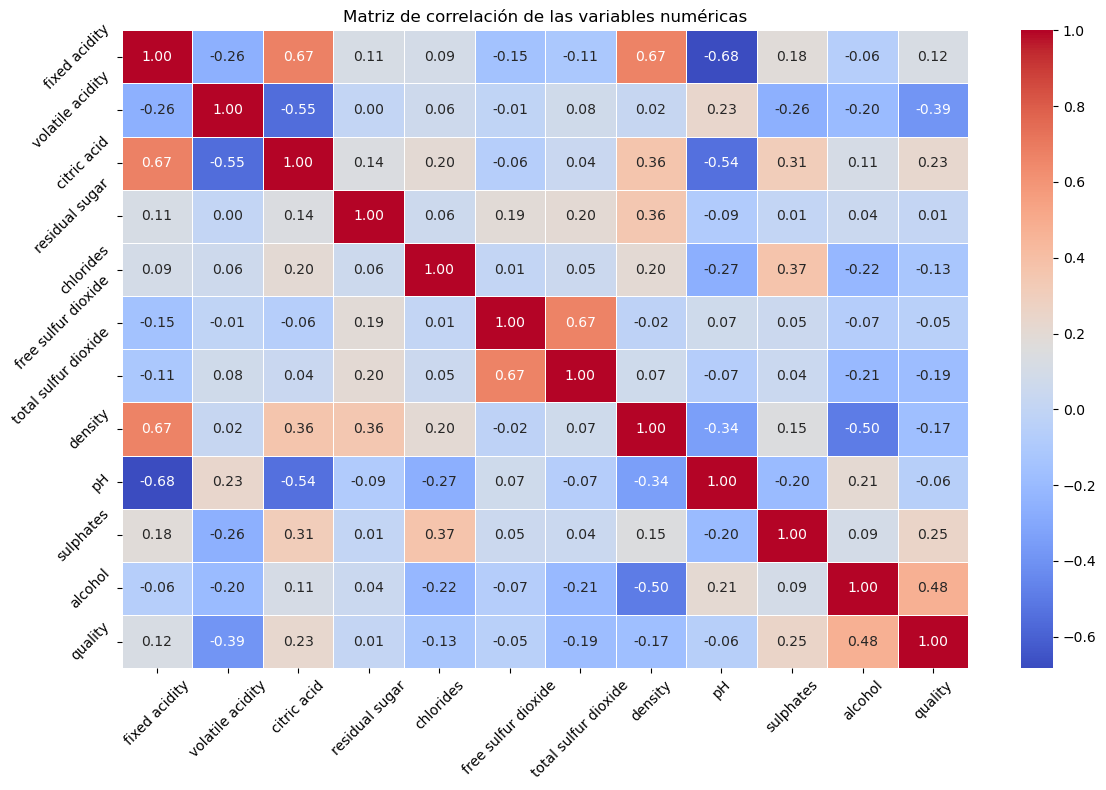

In [68]:
# Visualización de la matriz de correlación

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación de las variables numéricas")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:
X = data.drop("quality", axis=1)
y = data["quality"]

In [72]:
# Dividir en Train y Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Entrenar modelo Árbol de Decisión

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [76]:
# Evaluamos

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.559375
Matriz de Confusión:
 [[ 0  0  1  0  0  0]
 [ 0  0  8  1  1  0]
 [ 0  1 99 28  2  0]
 [ 0  0 54 65 13  0]
 [ 0  0  5 22 15  0]
 [ 0  0  0  3  2  0]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.76      0.67       130
           6       0.55      0.49      0.52       132
           7       0.45      0.36      0.40        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.27      0.27      0.26       320
weighted avg       0.53      0.56      0.54       320



C:\Users\Juan Camilo Rojas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Juan Camilo Rojas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Juan Camilo Rojas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


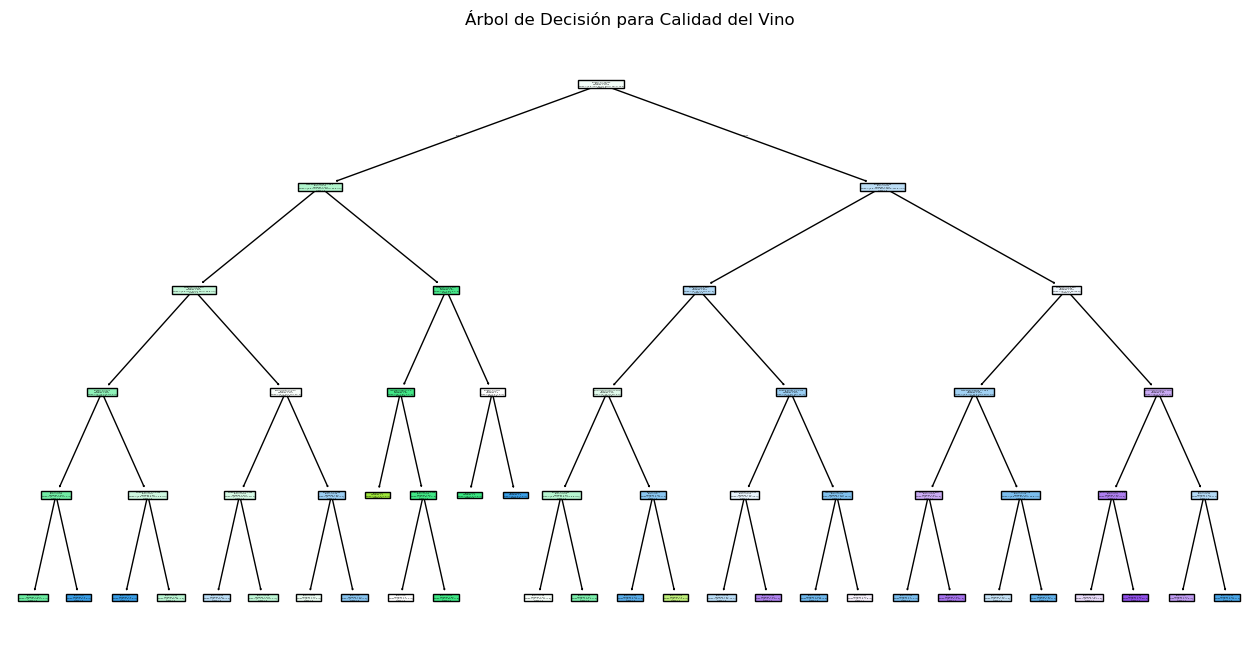

In [78]:
# Visualización del árbol

plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.title("Árbol de Decisión para Calidad del Vino")
plt.show()

Según la matriz de correlación y la estructura del árbol de decisión, las variables que más influyen en la predicción de la calidad del vino tinto son:

Alcohol: directamente proporcional a la calidad. A mayor contenido de alcohol, generalmente mayor calidad.

Volatile acidity: inversamente proporcional. A mayor acidez volátil, menor calidad.

Sulphates y citric acid también tienen un efecto positivo moderado en la calidad.

Por lo tanto, un vino con más alcohol y menos acidez volátil suele ser percibido como más equilibrado y agradable.

Clase 5 es la mejor clasificada: el modelo acertó en 99 de 130 casos → 76% de recall.

Clase 6 tiene confusiones frecuentes con la clase 5 → 54 vinos de calidad 6 fueron clasificados como 5.

Clases minoritarias (3, 4, 8) no están siendo correctamente clasificadas → todos sus valores son mal predichos.

El modelo confunde muchas veces clases adyacentes, lo cual tiene sentido dado que la calidad es una escala ordinal.

El modelo funciona razonablemente bien para las clases más frecuentes (calidades 5 y 6), que concentran la mayoría de los ejemplos.

Tiene bajo rendimiento en clases minoritarias, lo que es común en datasets desequilibrados.

La precisión general del 56% es aceptable, pero puede mejorarse.